In [171]:
import pandas as pd

In [172]:
df = pd.read_csv("Mall_Customers.csv")

Part2

In [173]:
# describing 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [174]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [176]:
df.loc[0:100]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42
99,100,Male,20,61,49


In [177]:
df.drop(["CustomerID"], axis=1) # but i won't save this result in the main df 

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [178]:
numerical_cols = df.select_dtypes(include=["number"]).columns.to_list()
categorical_cols = df.select_dtypes(exclude=["number"]).columns.to_list()

In [179]:
print("numerical_cols \n")
print(numerical_cols)
print("categorical_cols \n")
print(categorical_cols)

numerical_cols 

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical_cols 

['Genre']


In [180]:
for col in categorical_cols :
    df[col] = df[col].astype("category")


In [181]:
print("data types \n")
print(df.dtypes)
print("\n")
print(df.memory_usage(deep = True))

data types 

CustomerID                   int64
Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object


Index                      132
CustomerID                1600
Genre                      416
Age                       1600
Annual Income (k$)        1600
Spending Score (1-100)    1600
dtype: int64


In [182]:
for col in categorical_cols : 
    print("unique values in this col "+col)
    print(df[col].unique())
print("\n")

unique values in this col Genre
['Male', 'Female']
Categories (2, object): ['Female', 'Male']




In [183]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [184]:
# checking for missing values 
all_cols = df.columns
for col in all_cols : 
    missingValues = df[col].isnull().sum()
    percentage = (missingValues/ len(df[col])) * 100
    print(f"missing value in  {col} is {missingValues} and it's percentage is {percentage}")

missing value in  CustomerID is 0 and it's percentage is 0.0
missing value in  Genre is 0 and it's percentage is 0.0
missing value in  Age is 0 and it's percentage is 0.0
missing value in  Annual Income (k$) is 0 and it's percentage is 0.0
missing value in  Spending Score (1-100) is 0 and it's percentage is 0.0


Part 3

In [185]:
print("this part 3")

this part 3


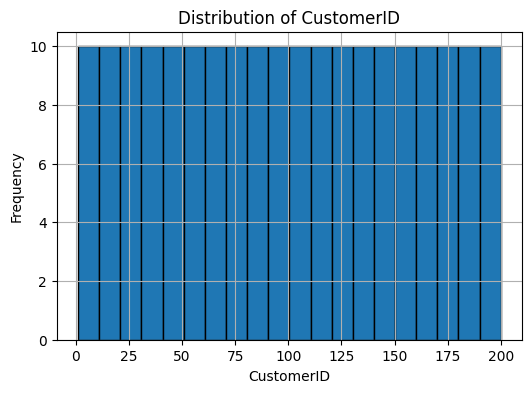

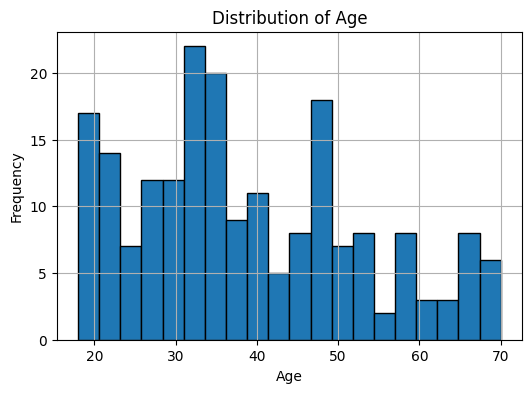

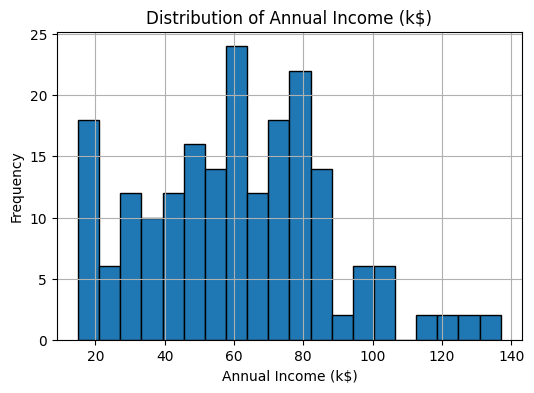

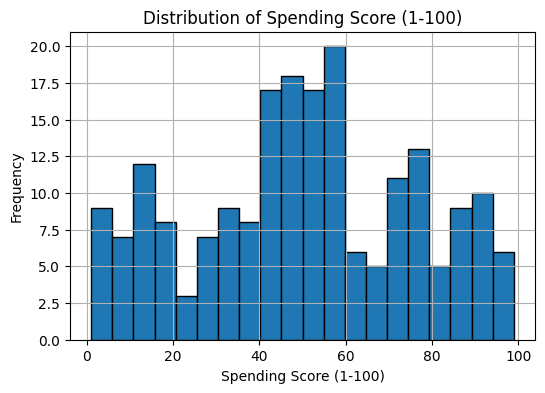

In [186]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [187]:
# to check about missing values 
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


part 4

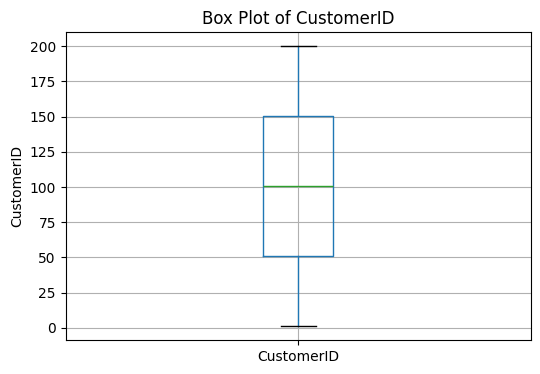

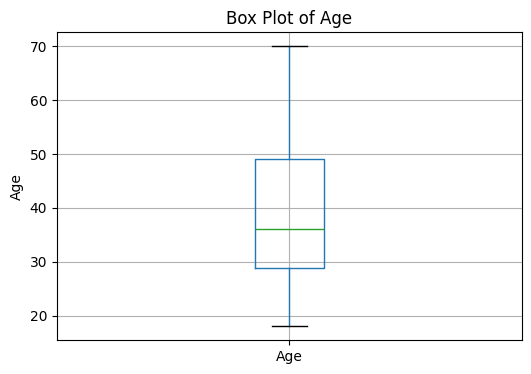

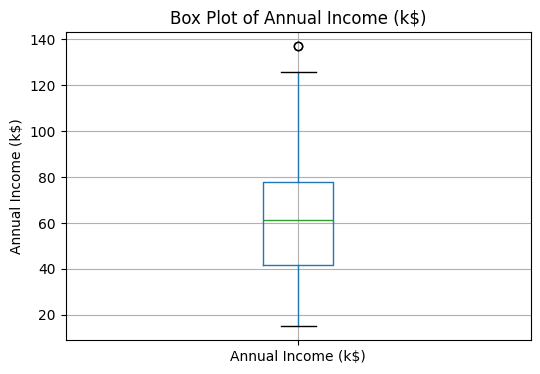

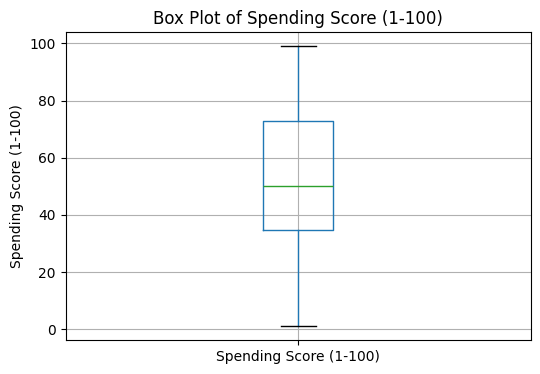

In [188]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

part 4 Q 2

In [189]:
# this code for replacing but there's no outliers
import numpy as np

for col in numerical_cols:
    Q1 = df[col].quantile(0.25) # this will get the number which .25 of data is less than it 
    Q3 = df[col].quantile(0.75) # ............................... .75 of the data is greater than it 
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col]) # upper_bound this the value which will be replaced if the condition is true else df[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

part 4 Q 3

In [190]:
for col in categorical_cols:
    print("\n") # comment 
    print(col) # comment
    value_counts = df[col].value_counts()
    print(value_counts) # comment
    rare_categories = value_counts[value_counts < 5].index  # getting the rare frequencies of the category 
    print("rare_categories") # comment
    print(rare_categories) # comment
    mode_value = df[col].mode()[0] # calculating mode 
    print(f"mode_value is {mode_value}") # comment
    df[col] = df[col].replace(rare_categories, mode_value) # replacing



Genre
Genre
Female    112
Male       88
Name: count, dtype: int64
rare_categories
CategoricalIndex([], categories=['Female', 'Male'], ordered=False, dtype='category', name='Genre')
mode_value is Female


In [191]:
print(f"len before removing duplicatesis {len(df)}")

len before removing duplicatesis 200


part 5,6,7,8

In [192]:

df = df.drop_duplicates()

print(f"Number of rows after removing duplicates: {len(df)}")

Number of rows after removing duplicates: 200


stanard deviation close to zero 

In [193]:
low_variance_cols = [col for col in numerical_cols if df[col].std() < 0.01] # getting the colmns which standard deviation clode to zero 
print
df = df.drop(columns=low_variance_cols)

print(f"Remaining columns: {df.columns.tolist()}")

Remaining columns: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [194]:

X = df.drop(columns=["Spending Score (1-100)"]) 
y = df["Spending Score (1-100)"] 

print(f"Features Shape: {X.shape}")
print(f"Label Shape: {y.shape}")

Features Shape: (200, 4)
Label Shape: (200,)


In [195]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,15.0,39.0
1,2.0,Male,21.0,15.0,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,5.0,Female,31.0,17.0,40.0


Encoding to convert all categoryies columns to numerical one 

بيستخدم Label Encoding لتحويل القيم النصية (Categories) إلى أرقام لكل عمود في categorical_cols.
مثال:
عمود يحتوي على ["Male", "Female", "Male"] يصبح [1, 0, 1].

In [196]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

In [197]:
X.head()

,CustomerID,Genre,Age,Annual Income (k$)
0,1.0,1,19.0,15.0
1,2.0,1,21.0,15.0
2,3.0,0,20.0,16.0
3,4.0,0,23.0,16.0
4,5.0,0,31.0,17.0


model building

In [198]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
from sklearn.linear_model import LinearRegression

# تدريب النموذج
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# التنبؤ على مجموعة الاختبار
y_pred_reg = regressor.predict(X_test)


In [200]:

mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 18.35364593280113
Mean Squared Error (MSE): 504.6382256452756
